Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

Importing Datasets

In [2]:
path=r'/Users/charlesrhodes/Documents'

In [3]:
df_original = pd.read_pickle(os.path.join(path,'df_original.pkl'))

In [4]:
df = pd.read_pickle(os.path.join(path,'df_62.pkl'))

In [5]:
df_2021 = df_original.drop([34, 58, 76, 86, 104, 110, 130, 137, 170, 173, 180, 182, 188, 202, 207])

In [6]:
df_2021.head()

,country_name,country_code,region,income_group,income_group_num,num_of_years,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Latin America & Caribbean,High income,4,35,,,,,...,-1.833977,5.635318,-0.709567,2.885166,1.515938,4.917139,4.738331,0.181216,-18.698325,17.2253
1,Afghanistan,AFG,South Asia,Low income,1,19,,,,,...,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.965296
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,2,41,,,,,...,4.536024,1.101887,1.028262,-2.64642,-6.011783,-3.633446,-4.676622,-4.014917,-8.635446,-2.050717
3,Albania,ALB,Europe & Central Asia,Upper middle income,3,41,,,,,...,1.584873,1.187234,1.985388,2.516827,3.480293,3.897741,4.276326,2.523894,-2.925821,9.526027
4,Andorra,AND,Europe & Central Asia,High income,4,50,0.997233,0.890677,-0.920696,-5.412483,...,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.00387,0.238297,-12.735078,7.110481


In [7]:
df_2021.shape

(196, 56)

Dropping Columns with Categorical Data

In [16]:
df_unsupervised = df.drop(columns =['country_name','country_code','region','income_group'])

In [17]:
df_unsupervised

,income_group_num,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,4,0.997233,0.890677,-0.920696,-5.412483,-2.528959,-2.660725,-3.598625,-4.552935,-2.007515,...,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.003870,0.238297,-12.735078,7.110481
6,3,0.020487,1.136093,3.754160,-1.673528,-3.563802,5.238803,-6.027002,8.472518,-0.077523,...,-2.145284,1.265685,-3.578581,1.629664,-3.110064,1.757648,-3.601610,-2.969563,-10.812611,9.357176
10,4,2.017709,1.062445,1.504868,0.096321,1.565296,2.434209,-0.273326,2.931672,1.787268,...,2.103808,0.828326,1.060337,0.693066,1.138424,0.604963,1.348283,0.665151,-1.278358,2.105711
11,4,5.592381,4.310906,3.765373,-0.099030,4.763370,5.039648,-0.129830,5.536448,1.731378,...,0.222451,-0.562299,-0.122371,-0.111540,0.892469,1.550724,1.927713,1.066970,-6.841545,4.102317
13,1,-6.328784,7.120849,-3.129500,-1.697838,5.641818,8.729454,-3.686738,-0.743761,-3.116111,...,0.824081,1.263599,0.810603,-5.980495,-2.206134,-1.772646,-1.377140,-1.457193,-2.508461,-0.889127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,4,4.138097,4.642156,-1.445134,-1.184581,4.391463,3.577147,4.422985,2.033887,-1.209298,...,1.533102,1.138692,1.540381,1.953004,0.933375,1.597136,2.404868,1.829668,-3.697922,5.820140
201,3,24.404011,-12.044189,-9.730163,-8.434084,9.501893,12.381524,9.015905,2.757370,1.872747,...,1.749452,3.066102,1.654739,3.200295,4.659683,2.068147,3.314670,0.745631,-5.048399,1.643546
208,3,-1.206552,1.638374,3.172395,-1.069843,-0.462109,-2.736869,0.273147,1.065033,3.846701,...,1.044229,1.099462,-0.172221,-0.757928,-0.309171,0.766942,0.285736,-0.987175,-7.481093,3.870315
209,1,6.223402,-3.722680,3.411370,-5.087758,3.117303,-7.365693,-2.394258,-5.854688,0.028077,...,4.103280,1.676101,1.352928,-0.312861,0.561271,0.331284,0.897347,-1.564237,-5.595733,1.669097


In [18]:
df_unsupervised.dtypes

income_group_num       int8
1972                float32
1973                float32
1974                float32
1975                float32
1976                float32
1977                float32
1978                float32
1979                float32
1980                float32
1981                float32
1982                float32
1983                float32
1984                float32
1985                float32
1986                float32
1987                float32
1988                float32
1989                float32
1990                float32
1991                float32
1992                float32
1993                float32
1994                float32
1995                float32
1996                float32
1997                float32
1998                float32
1999                float32
2000                float32
2001                float32
2002                float32
2003                float32
2004                float32
2005                float32
2006                

Elbow Technique

In [19]:
num_cl = range(1, 10)

In [20]:
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [21]:
score = [kmeans[i].fit(df_unsupervised).score(df_unsupervised) for i in range(len(kmeans))] 
score

[-140747.09375,
 -125121.46875,
 -115517.296875,
 -112938.28125,
 -105666.625,
 -100559.25,
 -97291.4140625,
 -94382.28125,
 -90419.9609375]

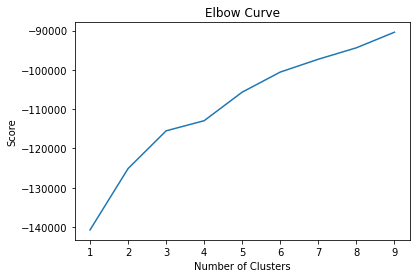

In [22]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [23]:
#The number of clusters seems to continually go up, so I will choose a larger range to see where the elbow point is.

In [24]:
num_cl = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [25]:
score = [kmeans[i].fit(df_unsupervised).score(df_unsupervised) for i in range(len(kmeans))] 
score

[-140747.09375,
 -125121.46875,
 -115322.1875,
 -109251.875,
 -105685.0,
 -101064.3828125,
 -99649.1796875,
 -94609.4296875,
 -88543.9453125,
 -87122.2421875,
 -85018.4921875,
 -79257.296875,
 -77731.359375,
 -76571.78125,
 -74181.0078125,
 -72160.3359375,
 -68787.0703125,
 -66904.296875,
 -65912.3984375,
 -63007.0859375,
 -60320.71875,
 -58356.68359375,
 -58202.16796875,
 -55543.68359375,
 -53769.2578125,
 -52404.4296875,
 -50035.5,
 -50114.58984375,
 -47909.0234375,
 -45307.36328125,
 -45001.0234375,
 -43896.51171875,
 -42412.828125,
 -40362.734375,
 -39787.59375,
 -37502.6796875,
 -37767.59375,
 -35052.2890625,
 -36106.03515625,
 -34166.05859375,
 -33468.91796875,
 -32659.818359375,
 -31679.697265625,
 -30565.46875,
 -28831.966796875,
 -28439.908203125,
 -27695.671875,
 -26359.359375,
 -25119.41015625]

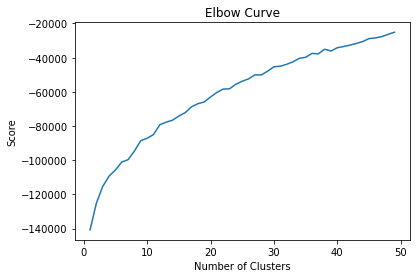

In [26]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [27]:
#The same issue is occuring, and a number over 50 seems like too much, so I will use 3 as my number of centroids, as the chart stops ascending as quickly after that point.

KMeans Clustering

In [28]:
kmeans = KMeans(n_clusters = 3) 

In [29]:
kmeans.fit(df_unsupervised)

KMeans(n_clusters=3)

In [30]:
df_unsupervised['clusters'] = kmeans.fit_predict(df_unsupervised)

In [31]:
df_unsupervised['clusters'].value_counts()

1    61
0    48
2     1
Name: clusters, dtype: int64

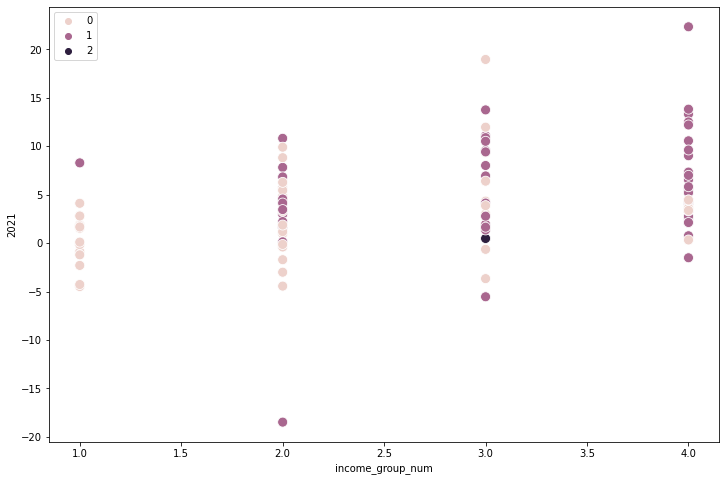

In [33]:
#Comparing income group number and 2021 GDP growth %
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsupervised['income_group_num'], y=df_unsupervised['2021'], hue=kmeans.labels_, s=100) 

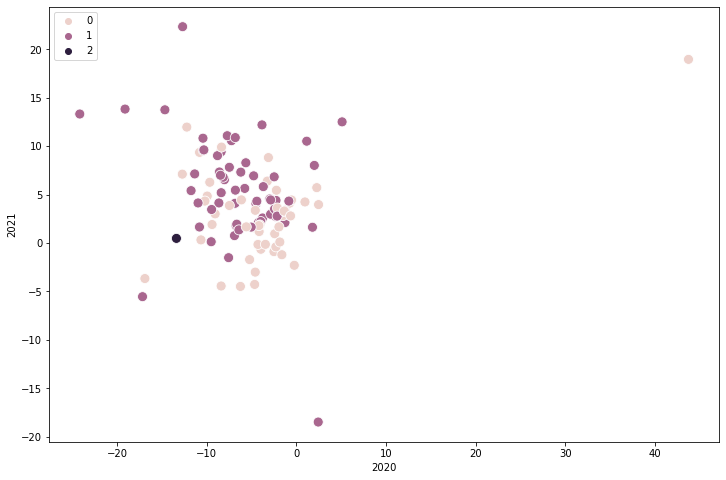

In [34]:
#Comparing 2020 and 2021 GDP Growth %
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsupervised['2020'], y=df_unsupervised['2021'], hue=kmeans.labels_, s=100) 

In [35]:
#Observations so far: None of these seem to be very telling, although the comparison between the last two years is better, though there is clearly cluster overlap and one point that is not clustered with other data

In [37]:
#I had an idea to change the years into rows to see if there were better clusters, so I created a new dataset in Excel with the years as a column for each country.

New Dataset

In [44]:
df_years = pd.read_pickle(os.path.join(path,'6point5years.pkl'))

In [45]:
df_years.head()

,country_name,country_code,region,income_group,income_group_num,year,gdp_growth_percent
0,Andorra,AND,Europe & Central Asia,High income,4,1972,0.997233297436878
1,Argentina,ARG,Latin America & Caribbean,Upper middle income,3,1972,0.0204873323872619
2,Australia,AUS,East Asia & Pacific,High income,4,1972,2.0177089085017
3,Austria,AUT,Europe & Central Asia,High income,4,1972,5.59238153081114
4,Burundi,BDI,Sub-Saharan Africa,Low income,1,1972,-6.32878360513878


In [47]:
df_years.shape

(5500, 7)

In [48]:
#This new dataset has years as a column now.

In [49]:
df_years.dtypes

country_name          object
country_code          object
region                object
income_group          object
income_group_num      object
year                  object
gdp_growth_percent    object
dtype: object

In [50]:
df_years['income_group_num']=df_years['income_group_num'].astype('int8')
df_years['year']=df_years['year'].astype('int16')
df_years['gdp_growth_percent']=df_years['gdp_growth_percent'].astype('float32')

In [51]:
df_years.dtypes

country_name           object
country_code           object
region                 object
income_group           object
income_group_num         int8
year                    int16
gdp_growth_percent    float32
dtype: object

In [52]:
#Removing the columns with categorical data
df_adjusted = df_years.drop(columns =['country_name','country_code','region','income_group'])

In [53]:
df_adjusted.head()

,income_group_num,year,gdp_growth_percent
0,4,1972,0.997233
1,3,1972,0.020487
2,4,1972,2.017709
3,4,1972,5.592381
4,1,1972,-6.328784


In [54]:
df_adjusted.shape

(5500, 3)

In [55]:
df_adjusted.dtypes

income_group_num         int8
year                    int16
gdp_growth_percent    float32
dtype: object

Elbow Technique with Adjusted Dataset

In [56]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [57]:
score = [kmeans[i].fit(df_adjusted).score(df_adjusted) for i in range(len(kmeans))] 
score

[-1304820.875,
 -445395.1875,
 -286588.96875,
 -229024.0625,
 -196117.515625,
 -171734.59375,
 -157715.234375,
 -144589.1875,
 -132712.71875]

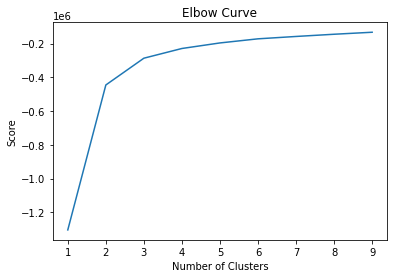

In [58]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [59]:
#It is clear here that the ideal number of clusters is 3, possibly 4, but we will go with 3 as it appears to flatten out a lot after 3.
#Also this looks a lot more normal than when the years were all separate columns.

KMeans Clustering

In [60]:
kmeans = KMeans(n_clusters = 3) 

In [61]:
kmeans.fit(df_adjusted)

KMeans(n_clusters=3)

In [63]:
df_adjusted['clusters'] = kmeans.fit_predict(df_adjusted)

In [64]:
df_adjusted['clusters'].value_counts()

1    1870
0    1870
2    1760
Name: clusters, dtype: int64

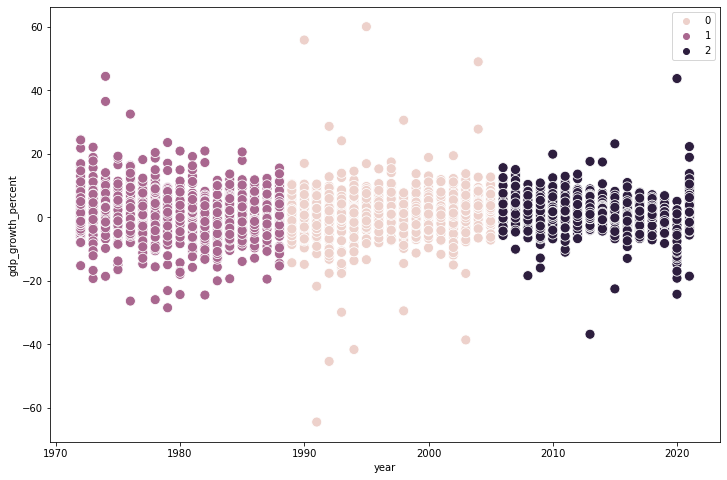

In [66]:
#Comparing Year and GDP Growth Percent
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_adjusted['year'], y=df_adjusted['gdp_growth_percent'], hue=kmeans.labels_, s=100) 

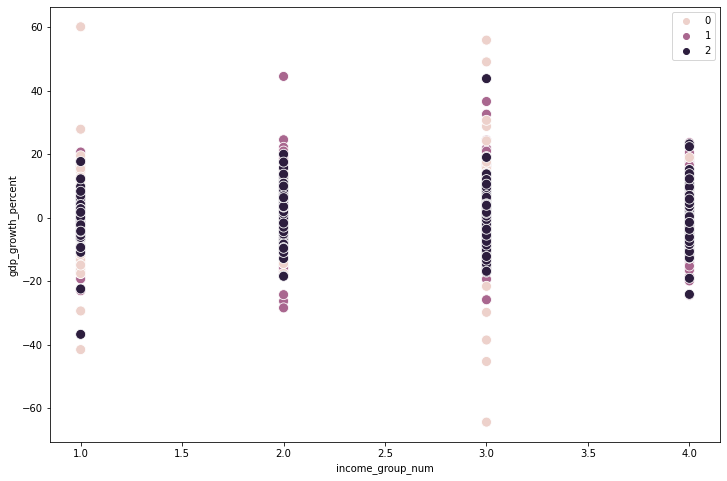

In [68]:
#Comparing Income Group Number and GDP Growth Percent
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_adjusted['income_group_num'], y=df_adjusted['gdp_growth_percent'], hue=kmeans.labels_, s=100) 

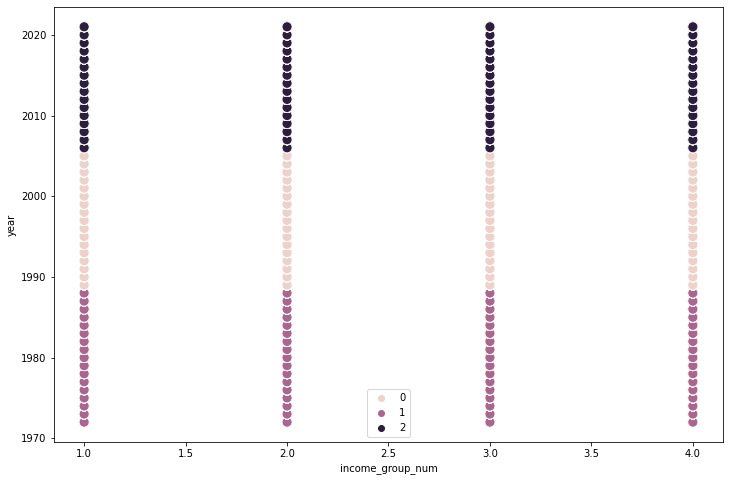

In [69]:
#Comparing Income Group Number and Year
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_adjusted['income_group_num'], y=df_adjusted['year'], hue=kmeans.labels_, s=100) 

Observations:
The charts all seem to be well grouped, although these groups only seem to be dictated by the income group number or the year.

In [70]:
df_adjusted.groupby('clusters').agg({'year':['mean', 'median'], 
                         'gdp_growth_percent':['mean', 'median'], 
                         'income_group_num':['mean', 'median']})

year         gdp_growth_percent           income_group_num       
            mean  median               mean    median             mean median
clusters                                                                     
0         1997.0  1997.0           1.691691  1.930871         2.745455    3.0
1         1980.0  1980.0           1.674117  2.023012         2.745455    3.0
2         2013.5  2013.5           1.562913  1.796683         2.745455    3.0

In [71]:
#For future analysis, more variables could be useful to add to this data. Another possibility is to look at ways of grouping the outcomes of each year.